In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Cutmix
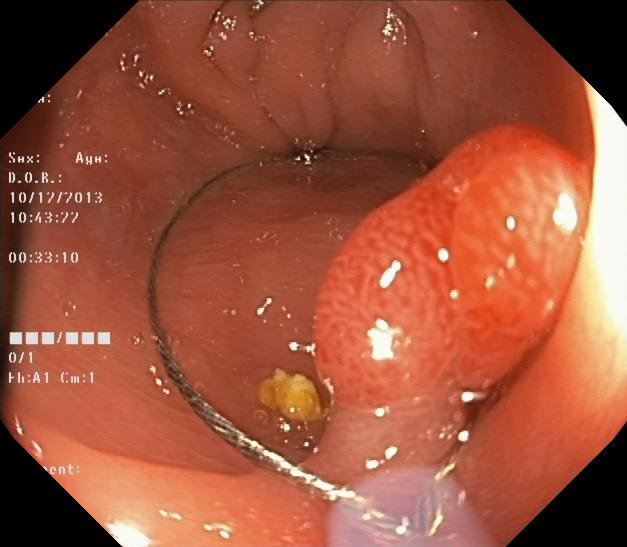
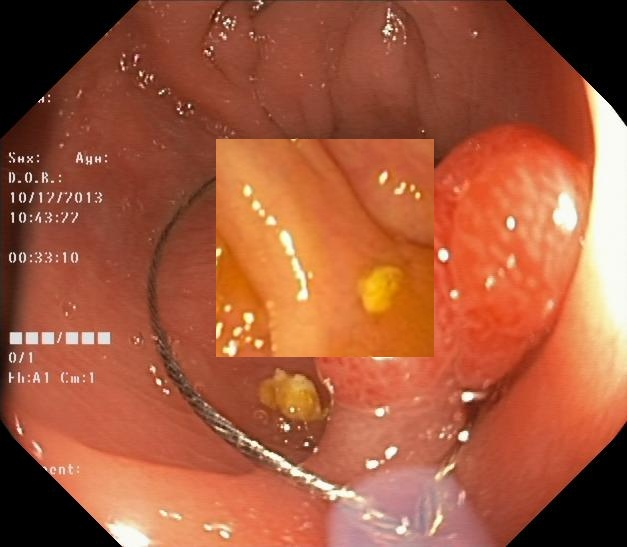

In [1]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import itertools
################
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import *
%matplotlib inline
from tensorflow import keras
from keras import *
import keras
import cv2
import shutil
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import regularizers
from keras.regularizers import l2
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5

!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/0_normal
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/3_esophagitis

!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/0_normal
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/3_esophagitis

!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/0_normal
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/3_esophagitis

!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/0_normal
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/3_esophagitis

In [ ]:
import os
import shutil

source_dir = "/content/drive/MyDrive/kaggledata/Raw_colon/train/3_esophagitis"
destination_dir = "/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/3_esophagitis"

files = os.listdir(source_dir)

for file_name in files:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.copy(source_file, destination_file)

print("All files have been copied successfully.")

All files have been copied successfully.


In [8]:
# TRAIN :
path1='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/0_normal'
path2='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/1_ulcerative_colitis'
path3='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/2_polyps'
path4='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/3_esophagitis'
files1=os.listdir(path1)
files2=os.listdir(path2)
files3=os.listdir(path3)
files4=os.listdir(path4)
num_files1=len(files1)
num_files2=len(files2)
num_files3=len(files3)
num_files4=len(files4)
print('0_normal :  ',num_files1)
print('1_ulcerative_colitis :  ',num_files2)
print('2_polyps :  ',num_files3)
print('3_esophagitis :  ',num_files4)

0_normal :   1200
1_ulcerative_colitis :   1200
2_polyps :   1200
3_esophagitis :   1200


#Cutmix_a = 0.2

In [ ]:
def cutmix(image1, image2, alpha):
      height, width, _ = image1.shape
      cut_ratio = int(height * alpha)

      x = np.random.randint(0, width - cut_ratio)
      y = np.random.randint(0, height - cut_ratio)

      image1_cut = image1[y:y+cut_ratio, x:x+cut_ratio]
      image2 = cv2.resize(image2, (width, height))
      image2_cut = image2[y:y+cut_ratio, x:x+cut_ratio]

      new_image = image1.copy()
      new_image[y:y+cut_ratio, x:x+cut_ratio] = image2_cut

      return new_image

alpha = 0.2

dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/0_normal'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/1_ulcerative_colitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/2_polyps'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/3_esophagitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)

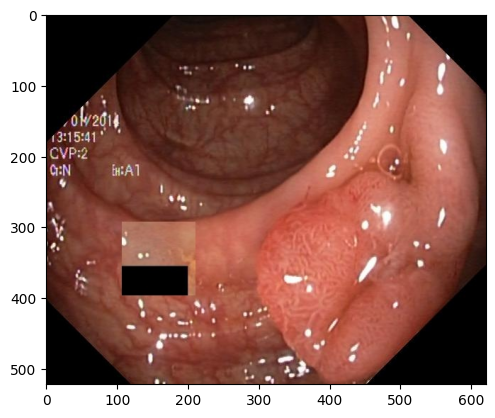

In [2]:
img = image.load_img('/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2/2_polyps/cutmix_240.jpg')
plt.imshow(img)

In [9]:
train_set='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.2'
val_set='/content/drive/MyDrive/kaggledata/Raw_colon/val'
test_set='/content/drive/MyDrive/kaggledata/Raw_colon/test'

train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')


base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model6 = Sequential()
model6.add(base_model)
model6.add(GaussianNoise(0.35))
model6.add(GlobalAveragePooling2D())
model6.add(Dense(256,activation='relu'))
model6.add(BatchNormalization())
model6.add(GaussianNoise(0.35))
model6.add(Dropout(0.2))
model6.add(Dense(4, activation='softmax'))
model6.summary()

model6.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model6.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history6 = model6.fit(
    train_generator,
    steps_per_epoch=30, 
    epochs = 50,     
    validation_data = validation_generator,
    callbacks=callbacks2,
)

Found 4800 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise_2 (Gaussian  (None, 7, 7, 1408)        0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               360704    
                                                             

In [13]:
model6.load_weights('model6.best.keras')
model6.evaluate(test_generator)
#1 بار : loss: 0.1159 - accuracy: 0.9563 - precision: 0.9585 - recall: 0.9538 - auc: 0.9969
#2 بار : loss: 0.1127 - accuracy: 0.9525 - precision: 0.9548 - recall: 0.9513 - auc: 0.9977
#3 بار : loss: 0.1240 - accuracy: 0.9575 - precision: 0.9574 - recall: 0.9550 - auc: 0.9971
#acc_Avg : 0.9554
print('-------------------------------------------------------------------')
model6.evaluate(validation_generator)
#1 بار : loss: 0.1549 - accuracy: 0.9460 - precision: 0.9468 - recall: 0.9425 - auc: 0.9948
#2 بار : loss: 0.1653 - accuracy: 0.9410 - precision: 0.9432 - recall: 0.9385 - auc: 0.9940
#3 بار : loss: 0.1614 - accuracy: 0.9425 - precision: 0.9461 - recall: 0.9400 - auc: 0.9946
#acc_Avg : 0.9431
print('-------------------------------------------------------------------')

50/50 [==============================] - 18s 357ms/step - loss: 0.1159 - accuracy: 0.9563 - precision: 0.9585 - recall: 0.9538 - auc: 0.9969
-------------------------------------------------------------------
125/125 [==============================] - 46s 365ms/step - loss: 0.1549 - accuracy: 0.9460 - precision: 0.9468 - recall: 0.9425 - auc: 0.9948
-------------------------------------------------------------------


<ipython-input-11-c3e7496d7ae5>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model6.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9748464575341788
Precision for all classes: 0.9758076587878651
Recall for all classes: 0.975
Confusion Matrix : 
 [[200   0   0   0]
 [  1 197   2   0]
 [  3  14 183   0]
 [  0   0   0 200]]


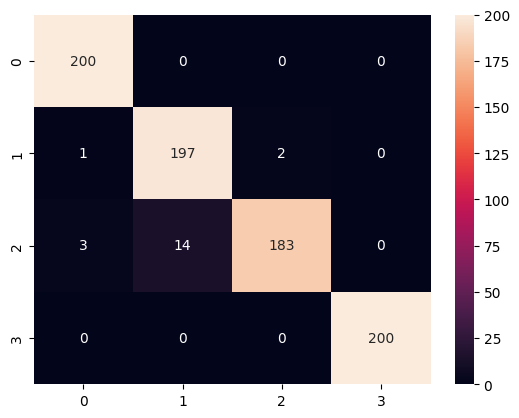

In [ ]:
model6.load_weights('model6.best.keras')
Y_pred = np.argmax(model6.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

#Cutmix_a = 0.3

In [ ]:
def cutmix(image1, image2, alpha):
      height, width, _ = image1.shape
      cut_ratio = int(height * alpha)

      x = np.random.randint(0, width - cut_ratio)
      y = np.random.randint(0, height - cut_ratio)

      image1_cut = image1[y:y+cut_ratio, x:x+cut_ratio]
      image2 = cv2.resize(image2, (width, height))
      image2_cut = image2[y:y+cut_ratio, x:x+cut_ratio]

      new_image = image1.copy()
      new_image[y:y+cut_ratio, x:x+cut_ratio] = image2_cut

      return new_image

alpha = 0.3

dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/0_normal'

images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/1_ulcerative_colitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/2_polyps'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/3_esophagitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)

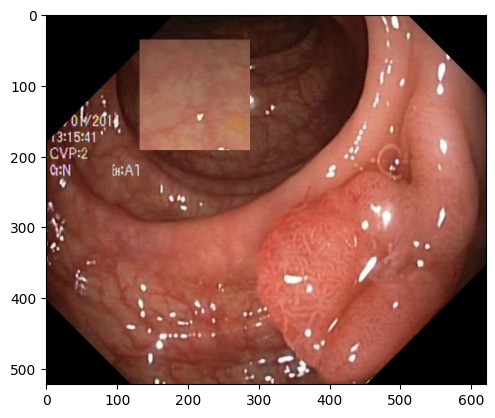

In [ ]:
img = image.load_img('/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3/2_polyps/cutmix_240.jpg')
plt.imshow(img)

In [14]:
train_set='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.3'
val_set='/content/drive/MyDrive/kaggledata/Raw_colon/val'
test_set='/content/drive/MyDrive/kaggledata/Raw_colon/test'


train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)


# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')


base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model7 = Sequential()
model7.add(base_model)
model7.add(GaussianNoise(0.35))
model7.add(GlobalAveragePooling2D())
model7.add(Dense(256,activation='relu'))
model7.add(BatchNormalization())
model7.add(GaussianNoise(0.35))
model7.add(Dropout(0.2))
model7.add(Dense(4, activation='softmax'))
model7.summary()
model7.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model7.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history7 = model7.fit(
    train_generator,
    steps_per_epoch=30,
    epochs = 50,     
    validation_data = validation_generator,
    callbacks=callbacks2,
)

Found 4800 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise_4 (Gaussian  (None, 7, 7, 1408)        0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_2  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 256)               360704    
                                                             

In [16]:
model7.load_weights('model7.best.keras')
model7.evaluate(test_generator)
#بار1: loss: 0.1004 - accuracy: 0.9638 - precision: 0.9661 - recall: 0.9625 - auc: 0.9982
#بار2: loss: 0.0904 - accuracy: 0.9613 - precision: 0.9624 - recall: 0.9588 - auc: 0.9985
#بار3: loss: 0.1016 - accuracy: 0.9700 - precision: 0.9699 - recall: 0.9663 - auc: 0.9980
#acc_Avg : 0.9650
print('-------------------------------------------------------------------')
model7.evaluate(validation_generator)
#بار1: loss: 0.1632 - accuracy: 0.9415 - precision: 0.9452 - recall: 0.9395 - auc: 0.9949
#بار2: loss: 0.1308 - accuracy: 0.9530 - precision: 0.9549 - recall: 0.9525 - auc: 0.9963
#بار3: loss: 0.1295 - accuracy: 0.9475 - precision: 0.9492 - recall: 0.9445 - auc: 0.9963
#acc_Avg : 0.9473
print('-------------------------------------------------------------------')

50/50 [==============================] - 18s 351ms/step - loss: 0.1016 - accuracy: 0.9700 - precision: 0.9699 - recall: 0.9663 - auc: 0.9980
-------------------------------------------------------------------
125/125 [==============================] - 52s 420ms/step - loss: 0.1295 - accuracy: 0.9475 - precision: 0.9492 - recall: 0.9445 - auc: 0.9963
-------------------------------------------------------------------


<ipython-input-18-aae4da88debd>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model7.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9571378395539523
Precision for all classes: 0.9571537114289176
Recall for all classes: 0.9575
Confusion Matrix : 
 [[200   0   0   0]
 [  1 182  14   3]
 [  6  10 184   0]
 [  0   0   0 200]]


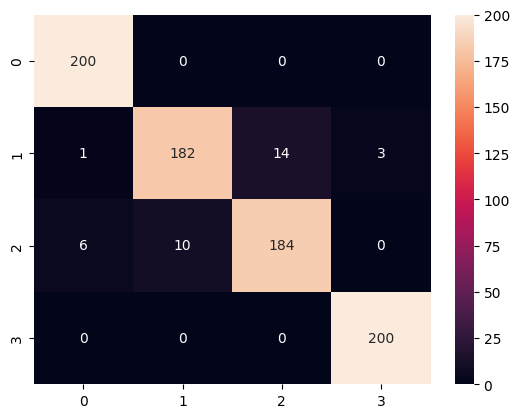

In [18]:
model7.load_weights('model7.best.keras')
Y_pred = np.argmax(model7.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

#Cutmix_a = 0.4

In [ ]:
def cutmix(image1, image2, alpha):
      height, width, _ = image1.shape
      cut_ratio = int(height * alpha)

      x = np.random.randint(0, width - cut_ratio)
      y = np.random.randint(0, height - cut_ratio)

      image1_cut = image1[y:y+cut_ratio, x:x+cut_ratio]
      image2 = cv2.resize(image2, (width, height))
      image2_cut = image2[y:y+cut_ratio, x:x+cut_ratio]

      new_image = image1.copy()
      new_image[y:y+cut_ratio, x:x+cut_ratio] = image2_cut

      return new_image

alpha = 0.4

dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/0_normal'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/1_ulcerative_colitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/2_polyps'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/3_esophagitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)

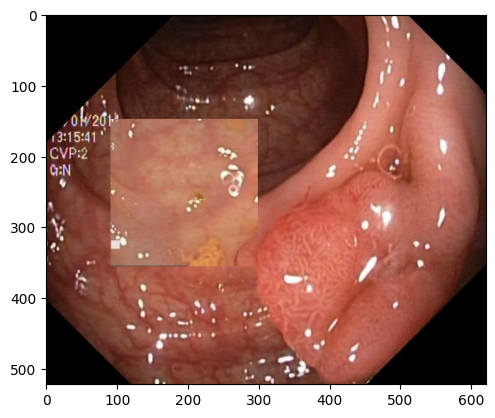

In [ ]:
img = image.load_img('/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4/2_polyps/cutmix_240.jpg')
plt.imshow(img)

In [19]:
train_set='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.4'
val_set='/content/drive/MyDrive/kaggledata/Raw_colon/val'
test_set='/content/drive/MyDrive/kaggledata/Raw_colon/test'


train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)


# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')


base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model8 = Sequential()
model8.add(base_model)
model8.add(GaussianNoise(0.35))
model8.add(GlobalAveragePooling2D())
model8.add(Dense(256,activation='relu'))
model8.add(BatchNormalization())
model8.add(GaussianNoise(0.35))
model8.add(Dropout(0.2))
model8.add(Dense(4, activation='softmax'))
model8.summary()
model8.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model8.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history8 = model8.fit(
    train_generator,
    steps_per_epoch=30, 
    epochs = 50,    
    validation_data = validation_generator,
    callbacks=callbacks2,
)

Found 4800 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise_6 (Gaussian  (None, 7, 7, 1408)        0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_3  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               360704    
                                                             

In [23]:
model8.load_weights('model8.best.keras')
model8.evaluate(test_generator)
#بار 1 : loss: 0.1252 - accuracy: 0.9538 - precision: 0.9561 - recall: 0.9538 - auc: 0.9966
#بار 2 : loss: 0.1257 - accuracy: 0.9563 - precision: 0.9574 - recall: 0.9563 - auc: 0.9967
#بار 3 : loss: 0.0991 - accuracy: 0.9638 - precision: 0.9649 - recall: 0.9625 - auc: 0.9976
#acc_val : 0.9579
print('-------------------------------------------------------------------')
model8.evaluate(validation_generator)
#بار 1 : loss: 0.1260 - accuracy: 0.9570 - precision: 0.9579 - recall: 0.9565 - auc: 0.9954
#بار 2 : loss: 0.1356 - accuracy: 0.9510 - precision: 0.9528 - recall: 0.9490 - auc: 0.9954
#بار 3 : loss: 0.1294 - accuracy: 0.9565 - precision: 0.9574 - recall: 0.9550 - auc: 0.9957
#acc_val : 0.9548
print('-------------------------------------------------------------------')

50/50 [==============================] - 18s 362ms/step - loss: 0.0991 - accuracy: 0.9638 - precision: 0.9649 - recall: 0.9625 - auc: 0.9976
-------------------------------------------------------------------
125/125 [==============================] - 44s 356ms/step - loss: 0.1294 - accuracy: 0.9565 - precision: 0.9574 - recall: 0.9550 - auc: 0.9957
-------------------------------------------------------------------


<ipython-input-10-4ccf22cc8f19>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model8.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9596967456501528
Precision for all classes: 0.9601564114843307
Recall for all classes: 0.96
Confusion Matrix : 
 [[200   0   0   0]
 [  4 180  14   2]
 [  4   7 189   0]
 [  0   0   1 199]]


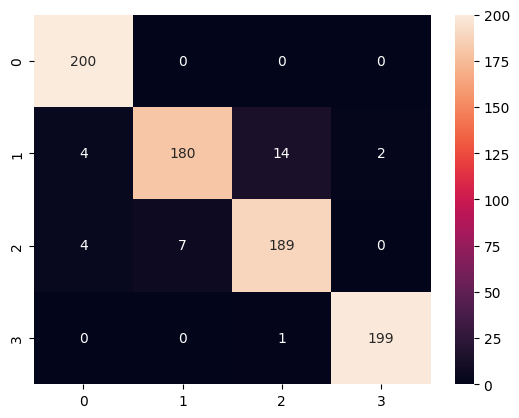

In [ ]:
model8.load_weights('model8.best.keras')
Y_pred = np.argmax(model8.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

#Cutmix_a = 0.5

In [ ]:
def cutmix(image1, image2, alpha):
      height, width, _ = image1.shape
      cut_ratio = int(height * alpha)

      x = np.random.randint(0, width - cut_ratio)
      y = np.random.randint(0, height - cut_ratio)

      image1_cut = image1[y:y+cut_ratio, x:x+cut_ratio]
      image2 = cv2.resize(image2, (width, height))
      image2_cut = image2[y:y+cut_ratio, x:x+cut_ratio]

      new_image = image1.copy()
      new_image[y:y+cut_ratio, x:x+cut_ratio] = image2_cut

      return new_image

alpha = 0.5

dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/0_normal'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/1_ulcerative_colitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/2_polyps'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)
#####################################################################################
dataset_path = '/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/3_esophagitis'
images = os.listdir(dataset_path)
for i in range(0, len(images), 2):
    image1 = cv2.imread(os.path.join(dataset_path, images[i]))
    image2 = cv2.imread(os.path.join(dataset_path, images[i+1]))
    new_image = cutmix(image1, image2, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutmix_{i}.jpg'), new_image)

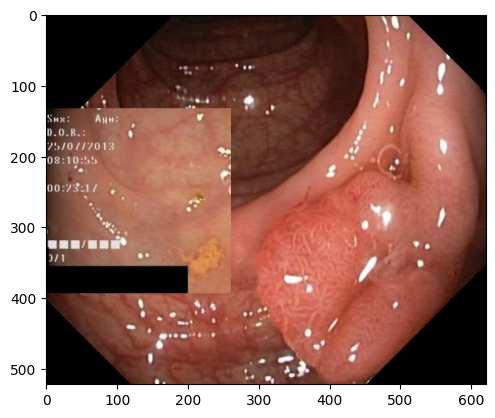

In [ ]:
img = image.load_img('/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5/2_polyps/cutmix_240.jpg')
plt.imshow(img)

In [3]:
train_set='/content/drive/MyDrive/kaggledata/Cutmix_colon/train_a=0.5'
val_set='/content/drive/MyDrive/kaggledata/Raw_colon/val'
test_set='/content/drive/MyDrive/kaggledata/Raw_colon/test'


train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)


# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')


base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model9 = Sequential()
model9.add(base_model)
model9.add(GaussianNoise(0.35))
model9.add(GlobalAveragePooling2D())
model9.add(Dense(256,activation='relu'))
model9.add(BatchNormalization())
model9.add(GaussianNoise(0.35))
model9.add(Dropout(0.2))
model9.add(Dense(4, activation='softmax'))
model9.summary()
model9.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model9.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history9 = model9.fit(
    train_generator,
    steps_per_epoch=30, 
    epochs = 50,    
    validation_data = validation_generator,
    callbacks=callbacks2,
)

import pickle

with open('training_history9.pkl', 'wb') as file:
    pickle.dump(history9.history, file)

Found 4800 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
31790344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 1408)        0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               360704   

In [6]:
model9.load_weights('model9.best.keras')
model9.evaluate(test_generator)
#بار1: loss: 0.0837 - accuracy: 0.9675 - precision: 0.9687 - recall: 0.9675 - auc: 0.9986
#بار2: loss: 0.0625 - accuracy: 0.9775 - precision: 0.9787 - recall: 0.9775 - auc: 0.9992
#بار3: loss: 0.0881 - accuracy: 0.9750 - precision: 0.9750 - recall: 0.9737 - auc: 0.9978
#acc_Avg : 0.9733
print('-------------------------------------------------------------------')
model9.evaluate(validation_generator)
#بار1: loss: 0.1301 - accuracy: 0.9555 - precision: 0.9569 - recall: 0.9540 - auc: 0.9961
#بار2: loss: 0.1190 - accuracy: 0.9575 - precision: 0.9599 - recall: 0.9570 - auc: 0.9958
#بار3: loss: 0.1106 - accuracy: 0.9620 - precision: 0.9629 - recall: 0.9595 - auc: 0.9967
#acc_Avg : 0.9583
print('-------------------------------------------------------------------')

50/50 [==============================] - 18s 363ms/step - loss: 0.0881 - accuracy: 0.9750 - precision: 0.9750 - recall: 0.9737 - auc: 0.9978
-------------------------------------------------------------------
125/125 [==============================] - 45s 362ms/step - loss: 0.1106 - accuracy: 0.9620 - precision: 0.9629 - recall: 0.9595 - auc: 0.9967
-------------------------------------------------------------------


<ipython-input-5-0bb6d75b55f8>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model9.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9736504510182971
Precision for all classes: 0.9738210723645895
Recall for all classes: 0.97375
Confusion Matrix : 
 [[200   0   0   0]
 [  0 193   4   3]
 [  2  11 187   0]
 [  0   0   1 199]]


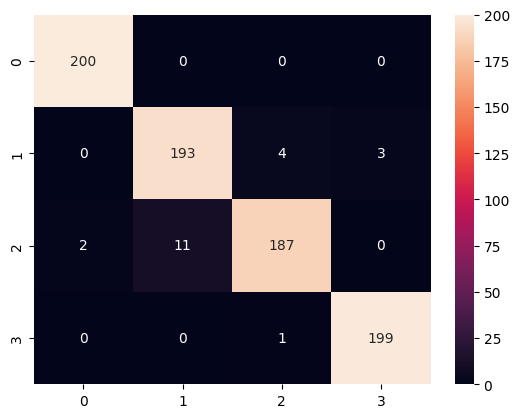

In [5]:
model9.load_weights('model9.best.keras')
Y_pred = np.argmax(model9.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

#=> So the best alpha for cutmix is : 0.5